In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pyspark as ps
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import arrays_zip, explode, col, first
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve
from statsmodels.tsa.seasonal import seasonal_decompose
import joblib

+-----+--------------------+--------------------+-----+
|   id|               dates|              values|label|
+-----+--------------------+--------------------+-----+
|19114|[2016-01-01, 2016...|[-1.86, 0.79, 1.4...|  0.0|
|22769|[2016-05-01, 2016...|[-1.04, -3.48, 0....|  1.0|
|76935|[2017-03-01, 2017...|[0.28, 0.63, 0.06...|  0.0|
|66297|[2016-01-01, 2016...|[-0.33, 0.58, 1.1...|  0.0|
| 2191|[2016-01-01, 2016...|[1.31, 0.5, -0.54...|  0.0|
|59504|[2016-03-01, 2016...|[0.08, 0.88, 1.46...|  0.0|
|49554|[2016-04-01, 2016...|[1.05, -0.28, 1.0...|  0.0|
|58344|[2016-12-01, 2017...|[-0.36, -0.45, -0...|  0.0|
|87449|[2016-01-01, 2016...|[2.92, 4.11, 3.39...|  1.0|
|43415|[2016-02-01, 2016...|[-0.86, -0.05, -0...|  1.0|
|76676|[2016-01-01, 2016...|[2.24, 0.46, 1.41...|  0.0|
| 4321|[2016-01-01, 2016...|[1.1, 1.73, 2.04,...|  0.0|
|17921|[2016-01-01, 2016...|[1.06, 1.04, 0.62...|  0.0|
|60176|[2016-01-01, 2016...|[1.41, -0.62, -1....|  0.0|
|61864|[2016-01-01, 2016...|[0.24, 0.37, 0.97...

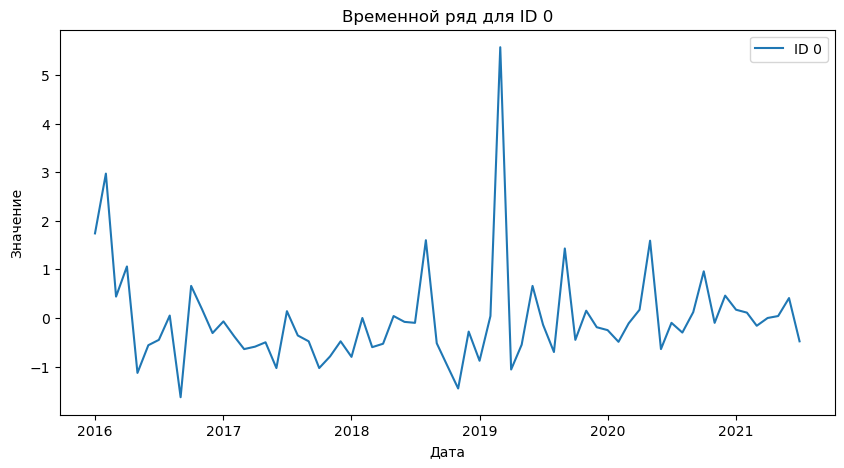

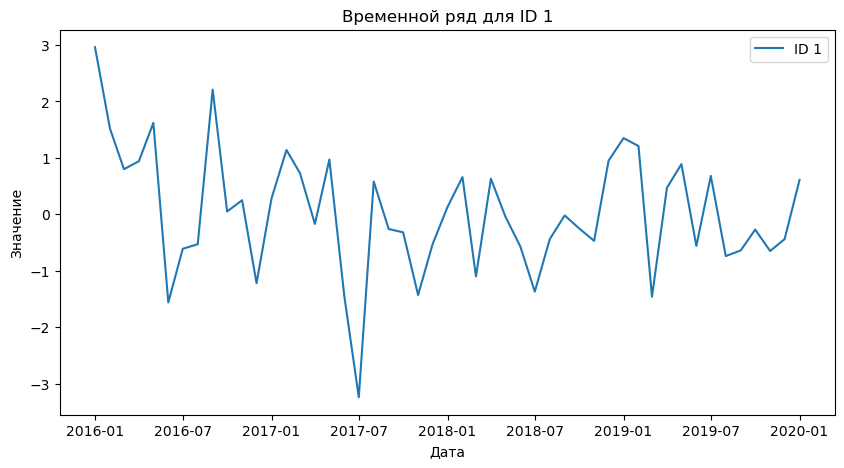

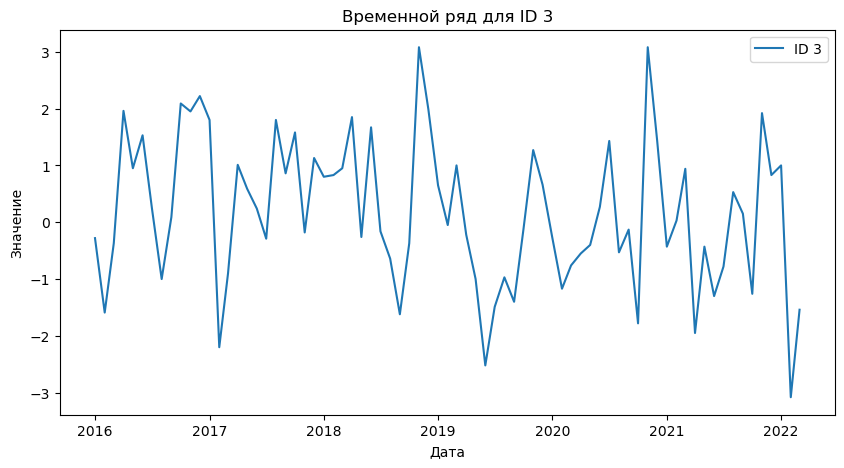

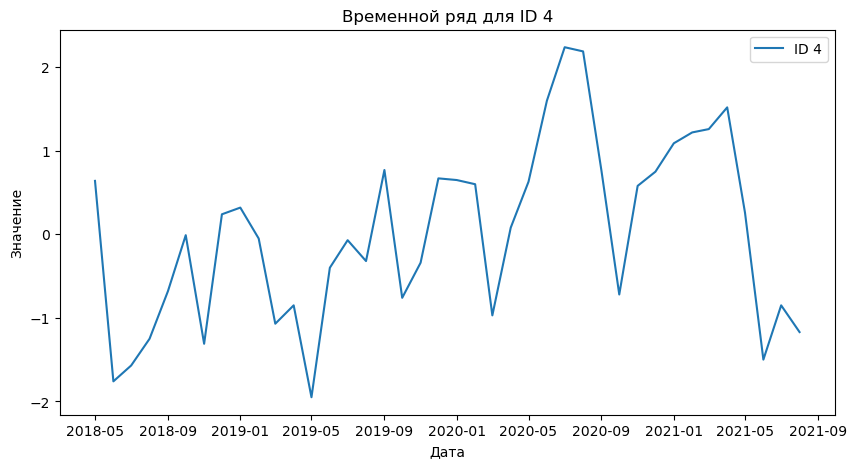

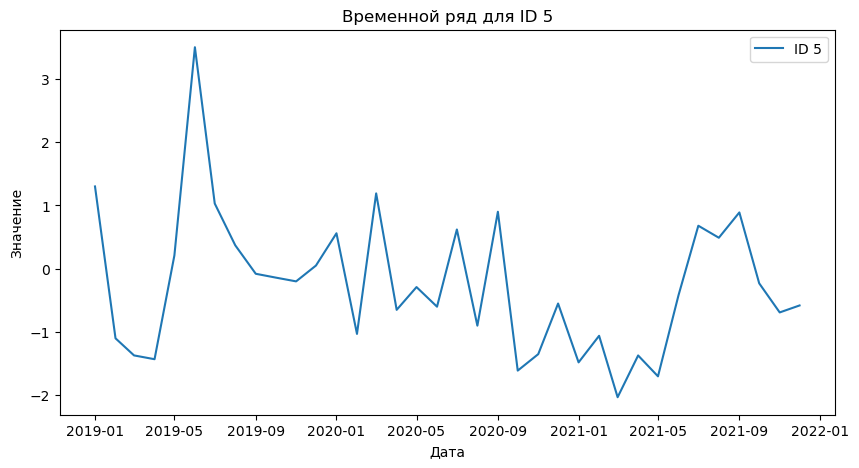

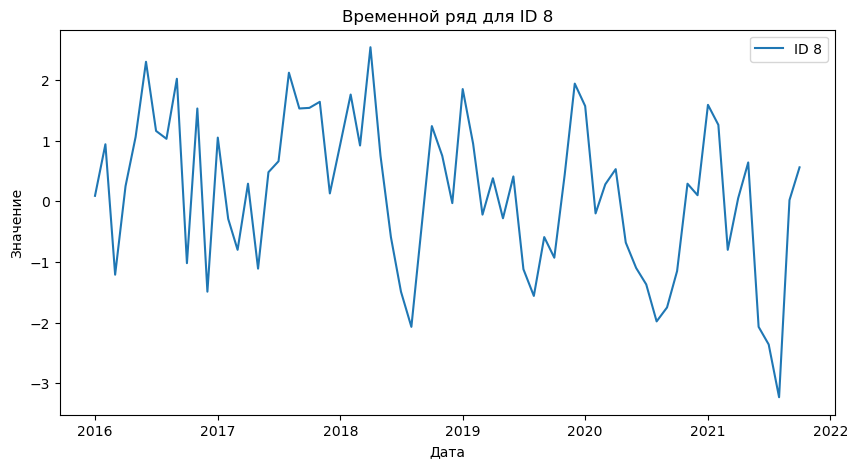

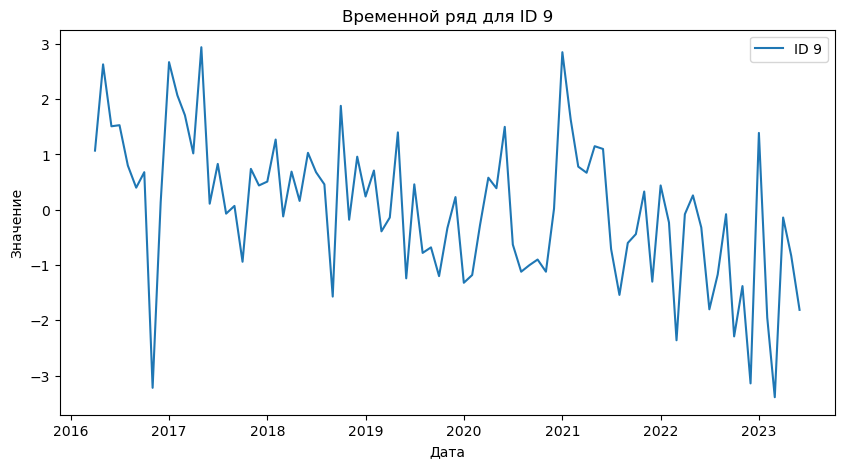

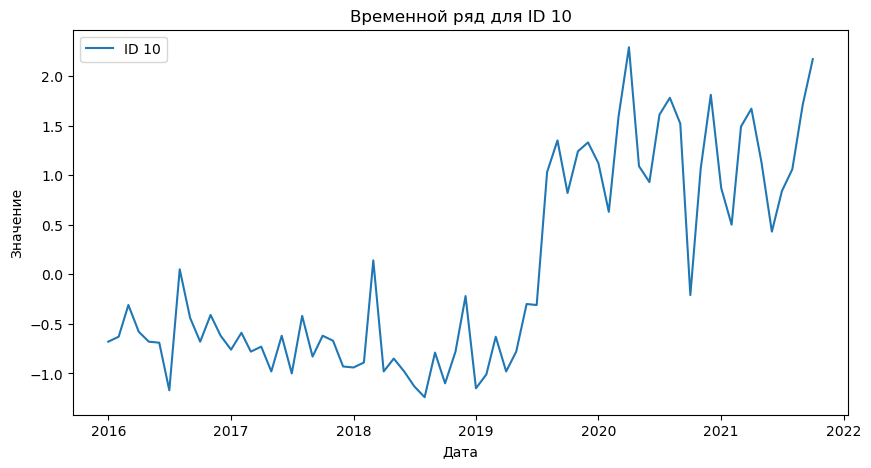

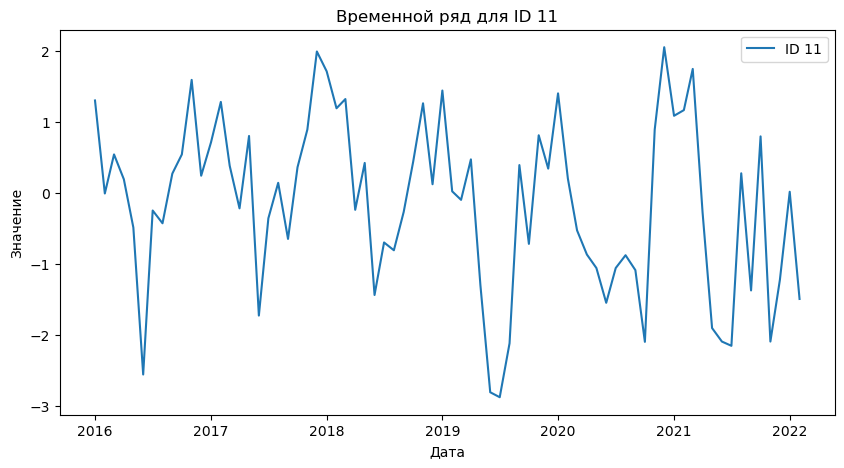

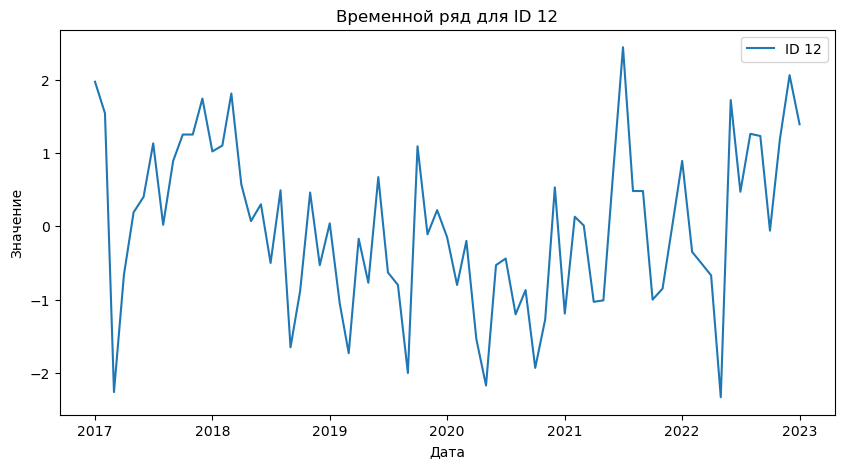

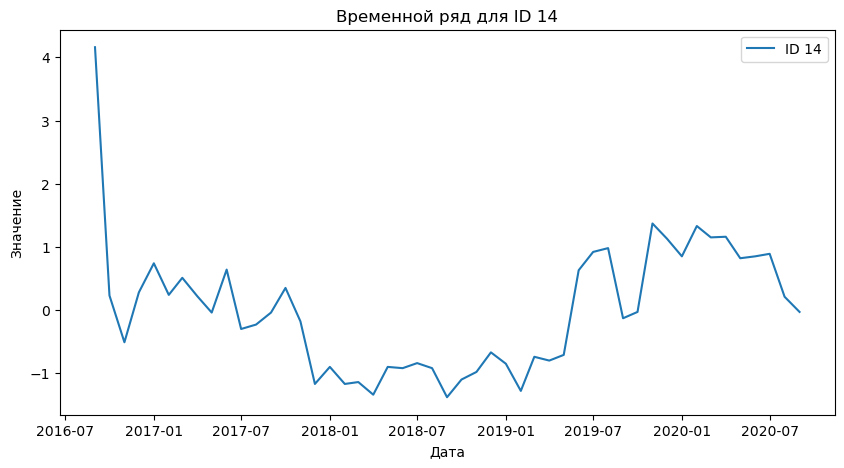

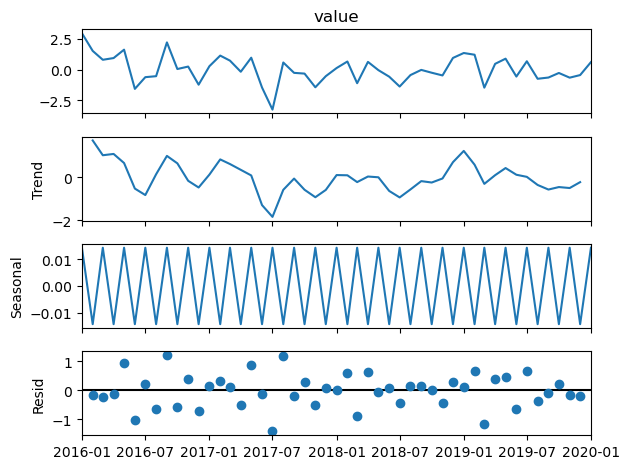

<class 'pandas.core.frame.DataFrame'>
Index: 5150830 entries, 0 to 5155411
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   date    float64
 2   value   float64
 3   label   float64
dtypes: float64(3), int64(1)
memory usage: 196.5 MB


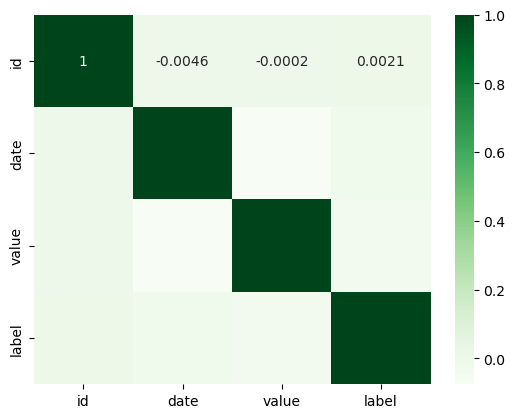

0:	learn: 0.6349227	total: 2.75s	remaining: 17m 16s
1:	learn: 0.6075072	total: 5.22s	remaining: 16m 22s
2:	learn: 0.5944118	total: 6.88s	remaining: 14m 19s


KeyboardInterrupt: 

KeyboardInterrupt: 

In [5]:
%run experiment.ipynb

In [10]:
cat_model = joblib.load('c_model_t')

In [ ]:
test_data = create_submission_df('train.parquet', 'test.parquet')

In [ ]:
y_fin_pred = cat_model.predict_proba(test_data)[:, 1]

In [ ]:
submission_df = pd.DataFrame({
    'id': test_data['id'],
    'score': y_fin_pred
})
submission_df.head()

In [ ]:
file_name = 'submission.csv'
if os.path.exists(file_name):
    os.remove(file_name)
submission_df.to_csv(file_name, index=False)